# 00 installation

In [ ]:
! pip install MediaInfo

  Preparing metadata (setup.py) ... done
  Created wheel for MediaInfo: filename=MediaInfo-0.0.9-py3-none-any.whl size=4604 sha256=30f06fe0ae2e1eea3081c0ee6e990c7caeabc3a0c4cc4cf6272048e2a5c3a7f1
  Stored in directory: /root/.cache/pip/wheels/b4/d9/50/e34cb8a5d1634bc0e174fec276ddc7339dcd7f2980ab77bbbc
Successfully built MediaInfo


# 01 Download the file names

In [ ]:
! gsutil ls "gs://yogera_voices_backup"

gs://yogera_voices_backup/Acholi/
gs://yogera_voices_backup/DB_Backups/
gs://yogera_voices_backup/Luganda/
gs://yogera_voices_backup/Lumasaaba/
gs://yogera_voices_backup/Lumasaba/
gs://yogera_voices_backup/Lusoga/
gs://yogera_voices_backup/Runyankole-Rukiga/


In [ ]:
import subprocess
import pandas as pd

STORAGE_BUCKET = "gs://yogera_voices_backup/Runyankole-Rukiga"

response = subprocess.run(
    args = ['gsutil', 'ls', STORAGE_BUCKET],
    text = True,
    capture_output=True
)
links = response.stdout.split('\n')

In [ ]:
wholedf = pd.DataFrame(columns=['link','filename'])

for link in links:

    filename = link.split('/')[-1]
    meta     = filename.split('_')
    if len(meta)<3:continue
    year     = str(meta[3])[:4]
    month    = meta[3][4:6]
    day      = meta[3][6:]

    wholedf = pd.concat(
        [
            wholedf,
            pd.DataFrame(
                data={
                    'link'    :link,
                    'filename':filename,
                    'year'    :year,
                    'month'   :month,
                    'day'     :day,
                },
                index=[0]
            )
        ],
        ignore_index=True
    )
wholedf

,link,filename,year,month,day
0,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.604281_1058...,2023,08,25
1,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.617749_1123...,2023,08,25
2,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.626641_1070...,2023,08,25
3,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.635852_1242...,2023,08,25
4,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.648657_1012...,2023,08,25
...,...,...,...,...,...
54704,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20240624_181019.321119_2986...,2024,06,24
54705,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20240624_181118.695184_1850...,2024,06,24
54706,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20240624_181143.961912_2965...,2024,06,24
54707,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20240624_215840.637651_1317...,2024,06,24


In [ ]:
wholedf.to_csv('yogerafull.csv')

In [ ]:
from os import system
from MediaInfo import MediaInfo

df = pd.DataFrame(columns=['link','filename'])
reduced_links = links[:548]

for link in reduced_links:

    filename = link.split('/')[-1]
    meta     = filename.split('_')
    if len(meta)<3:continue
    year     = str(meta[3])[:4]
    month    = meta[3][4:6]
    day      = meta[3][6:]
    args =  ['gsutil', 'ls', '-L', link]
    response = subprocess.run(
        args = args,
        text = True,
        capture_output=True
    )
    bytesd = response.stdout.split('\n')[4].split(':')[1]
    bytesd = int(bytesd)

    system(f'gsutil -m cp -r "{link}" .')
    audio_info        = MediaInfo(filename = filename).getInfo()
    container         = audio_info['container']
    fileSize          = audio_info['fileSize']
    duration          = audio_info['duration']
    bitrate           = audio_info['bitrate']
    haveAudio         = audio_info['haveAudio']
    audioCodec        = audio_info['audioCodec']
    audioCodecProfile = audio_info['audioCodecProfile']
    audioDuration     = audio_info['audioDuration']
    audioBitrate      = audio_info['audioBitrate']
    audioChannel      = audio_info['audioChannel']
    audioSamplingRate = audio_info['audioSamplingRate']
    audioFrameCount   = audio_info['audioFrameCount']
    system(f'rm -rf "{filename}" .')
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                data={
                    'link'    :link,
                    'filename':filename,
                    'year'    :year,
                    'month'   :month,
                    'day'     :day,
                    'bytes' : bytesd,
                    'container': container,
                    'fileSize': fileSize,
                    'duration': duration,
                    'bitrate': bitrate,
                    'haveAudio': haveAudio,
                    'audioCodec': audioCodec,
                    'audioCodecProfile': audioCodecProfile,
                    'audioDuration': audioDuration,
                    'audioBitrate': audioBitrate,
                    'audioChannel': audioChannel,
                    'audioSamplingRate': audioSamplingRate,
                    'audioFrameCount': audioFrameCount,
                },
                index=[0]
            )
        ],
        ignore_index=True
    )
df

,link,filename,year,month,day,bytes,container,fileSize,duration,bitrate,haveAudio,audioCodec,audioCodecProfile,audioDuration,audioBitrate,audioChannel,audioSamplingRate,audioFrameCount
0,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.604281_1058...,2023,08,25,672044.0,wav,672044,21.000000,256016,1.0,pcm_s16le,None,21.000000,256000,1.0,16000,165
1,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.617749_1123...,2023,08,25,675884.0,wav,675884,21.120000,256016,1.0,pcm_s16le,None,21.120000,256000,1.0,16000,165
2,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.626641_1070...,2023,08,25,526124.0,wav,526124,16.440000,256021,1.0,pcm_s16le,None,16.440000,256000,1.0,16000,129
3,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.635852_1242...,2023,08,25,314924.0,wav,314924,9.840000,256035,1.0,pcm_s16le,None,9.840000,256000,1.0,16000,77
4,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_093701.648657_1012...,2023,08,25,555564.0,wav,555564,17.360000,256020,1.0,pcm_s16le,None,17.360000,256000,1.0,16000,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_124212.408737_1201...,2023,08,25,634924.0,wav,634924,19.840000,256017,1.0,pcm_s16le,None,19.840000,256000,1.0,16000,155
544,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_124212.420476_1365...,2023,08,25,491564.0,wav,491564,15.360000,256022,1.0,pcm_s16le,None,15.360000,256000,1.0,16000,120
545,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_124458.821655_1386...,2023,08,25,718124.0,wav,718124,22.440000,256015,1.0,pcm_s16le,None,22.440000,256000,1.0,16000,176
546,gs://yogera_voices_backup/Runyankole-Rukiga/yo...,yogera_image_audio_20230825_124458.833343_1338...,2023,08,25,519724.0,wav,519724,16.240000,256021,1.0,pcm_s16le,None,16.240000,256000,1.0,16000,127


In [ ]:
df.to_csv('yogera1percent.csv')

In [ ]:
df.columns


Index(['link', 'filename', 'year', 'month', 'day', 'bytes', 'container',
       'fileSize', 'duration', 'bitrate', 'haveAudio', 'audioCodec',
       'audioCodecProfile', 'audioDuration', 'audioBitrate', 'audioChannel',
       'audioSamplingRate', 'audioFrameCount'],
      dtype='object')

In [ ]:
bs = df['bytes'].astype(float)/1000
bs.describe()

count     548.000000
mean      674.835241
std       193.400855
min       266.284000
25%       555.564000
50%       622.764000
75%       718.124000
max      1455.404000
Name: bytes, dtype: float64

In [ ]:
df.duration.astype(float).describe()

count    548.000000
mean      21.087226
std        6.043777
min        8.320000
25%       17.360000
50%       19.460000
75%       22.440000
max       45.480000
Name: duration, dtype: float64

In [ ]:
df.bitrate.astype(int).describe()


count       548.000000
mean     256017.204380
std           3.994308
min      256007.000000
25%      256015.000000
50%      256018.000000
75%      256020.000000
max      256042.000000
Name: bitrate, dtype: float64

# 02 Get Metadata

In [ ]:
!gsutil help

Usage: gsutil [-D] [-DD] [-h header]... [-i service_account] [-m] [-o section:flag=value]... [-q] [-u user_project] [command [opts...] args...]
Available commands:
  acl              Get, set, or change bucket and/or object ACLs
  autoclass        Configure Autoclass feature
  bucketpolicyonly Configure uniform bucket-level access
  cat              Concatenate object content to stdout
  compose          Concatenate a sequence of objects into a new composite object.
  config           Obtain credentials and create configuration file
  cors             Get or set a CORS configuration for one or more buckets
  cp               Copy files and objects
  defacl           Get, set, or change default ACL on buckets
  defstorageclass  Get or set the default storage class on buckets
  du               Display object size usage
  hash             Calculate file hashes
  help             Get help about commands and topics
  hmac             CRUD operations on service account HMAC keys.
  iam     

In [ ]:
INDEX = 1

sample_link = df.link[INDEX]
sample_link_file_name = df.filename[INDEX]
sample_link

'gs://yogera_voices_backup/Runyankole-Rukiga/yogera_image_audio_20230825_093701.617749_1123.wav'

In [ ]:
args =  ['gsutil', 'ls', '-L', 'gs://yogera_voices_backup/Runyankole-Rukiga/yogera_image_audio_20230825_093701.617749_1123.wav']
import subprocess
response = subprocess.run(
    args = args,
    text = True,
    capture_output=True
)
bytesd = response.stdout.split('\n')[4].split(':')[1]
int(bytesd)

675884

In [ ]:
import os
os.system(f'gsutil -m cp -r "{sample_link}" .')

0

In [ ]:
import wave
wave_obj = wave.open(sample_link_file_name,'rb')
wave_obj.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=337920, comptype='NONE', compname='not compressed')

In [ ]:
os.system('pip install pydub')

0

In [ ]:
from pydub import AudioSegment
wav_file = AudioSegment.from_file(file=sample_link_file_name, format='wav')

In [ ]:
wav_file.max # max amplitude
print (len(wav_file)/1000, 'seconds')

21.12 seconds


In [ ]:
import soundfile as sf

ob = sf.SoundFile(sample_link_file_name)
print('Sample rate: {}'.format(ob.samplerate))
print('Channels: {}'.format(ob.channels))
print('Subtype: {}'.format(ob.subtype))

Sample rate: 16000
Channels: 1
Subtype: PCM_16


In [ ]:
import scipy
scipy.io.wavfile.read(filename=sample_link_file_name)

(16000, array([    0,     0,     0, ..., -1041, -1048, -1065], dtype=int16))

In [ ]:
from MediaInfo import MediaInfo
MediaInfo(filename = sample_link_file_name).getInfo()

{'container': 'wav',
 'fileSize': '675884',
 'duration': '21.120000',
 'bitrate': '256016',
 'haveAudio': 1,
 'audioCodec': 'pcm_s16le',
 'audioCodecProfile': None,
 'audioDuration': '21.120000',
 'audioBitrate': '256000',
 'audioChannel': 1,
 'audioSamplingRate': '16000',
 'audioFrameCount': '165'}

# 03 Visualisations

1. Fourier Transform

2. Spectrogram

3. Pitch Detection

4. Mel-Frequency Cepstral Coefficients (MFCC)

5. Waveform Analysis

6. Time-Frequency Analysis

7. Spectral Analysis


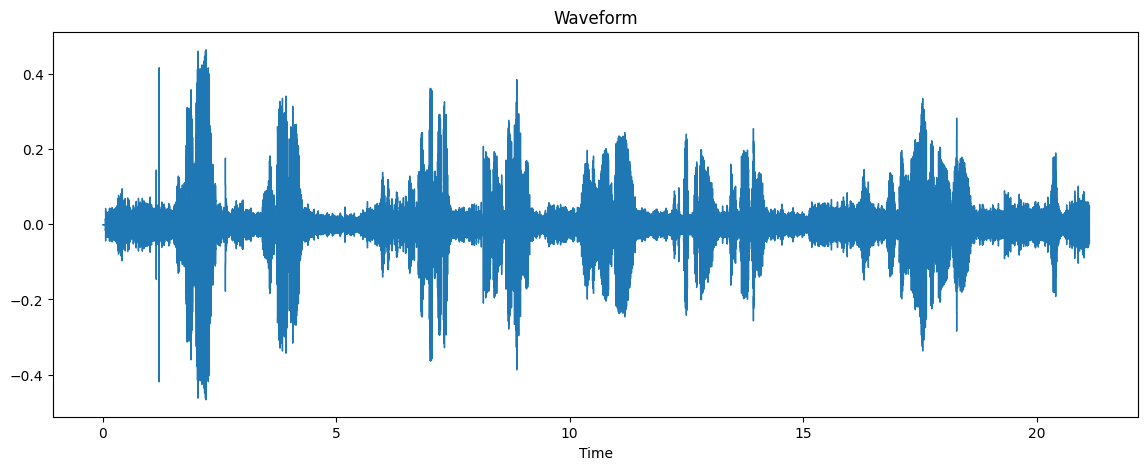

In [ ]:
import librosa.display
import matplotlib.pyplot as plt
import librosa
y, sr = librosa.load(sample_link_file_name, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()


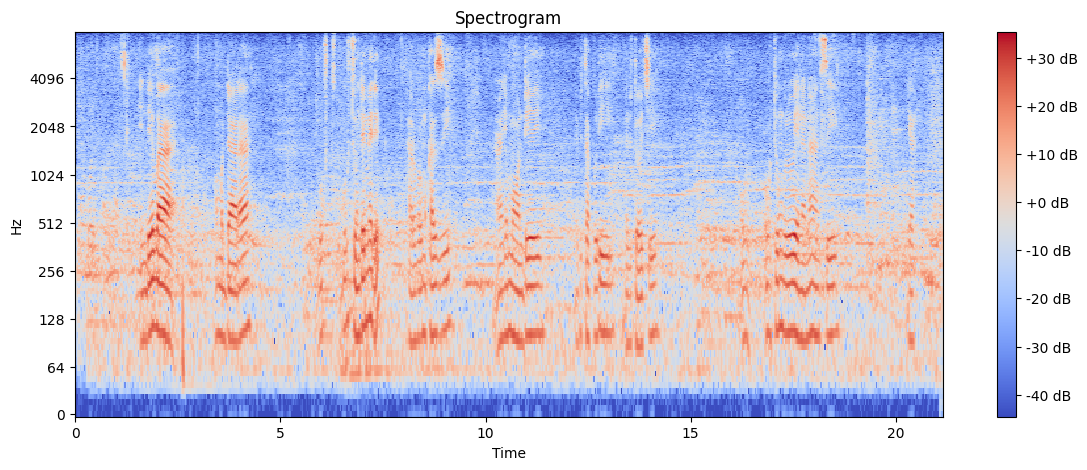

In [ ]:
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


# 04 transcripted audio

In [1]:
!pip install --upgrade --quiet pip
!pip install --upgrade --quiet datasets[audio] transformers accelerate evaluate jiwer tensorboard gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━

In [2]:
import pandas as pd
from huggingface_hub import notebook_login
# from datasets import load_dataset, DatasetDict
from sklearn.model_selection import train_test_split

In [3]:
TRANSCRIPTION_CSV = 'https://raw.githubusercontent.com/AI-Lab-Makerere/Yogera-Dataset-Metadata/main/version_3.0.1/nyn/transcribed_and_reviewed.csv'
transcription_df = pd.read_csv(TRANSCRIPTION_CSV)
# transcription_df['path'] = transcription_df.voice_clip.apply(lambda x: 'audio/'+str(x))
transcription_df['link'] = transcription_df.voice_clip.apply(lambda x: 'https://storage.googleapis.com/yogera_voices_backup/Runyankole-Rukiga/'+str(x))
transcription_df.head(4)

,image_url,contributor_id,gender,age_group,language,voice_clip,duration,up_votes,down_votes,transcript,link
0,https://storage.googleapis.com/image_prompts/d...,25,Male,18-29,Runyankole-Rukiga,yogera_image_audio_20230825_101638.084919_1448...,0.004444,2,1,Omukishushani nindeebamu aha maisho y'enjojo h...,https://storage.googleapis.com/yogera_voices_b...
1,https://storage.googleapis.com/image_prompts/1...,34,Female,18-29,Runyankole-Rukiga,yogera_image_audio_20230825_102016.896202_1136...,0.005000,2,1,Nindeeba motoka nyingi zaaminibaasi omutakisi ...,https://storage.googleapis.com/yogera_voices_b...
2,https://storage.googleapis.com/image_prompts/1...,34,Female,18-29,Runyankole-Rukiga,yogera_image_audio_20230825_102016.887275_1199...,0.006389,2,1,Ekizimbe kya kanyina eki bariyo nibombeka kiky...,https://storage.googleapis.com/yogera_voices_b...
3,https://storage.googleapis.com/image_prompts/7...,30,Male,18-29,Runyankole-Rukiga,yogera_image_audio_20230825_103048.881297_1347...,0.005833,2,1,Nindeeba omushaija ari aha piki ye nindeebaho ...,https://storage.googleapis.com/yogera_voices_b...


In [4]:
transcription_df.duration.sum()

10.127777777777698

In [7]:
ids = transcription_df.groupby('contributor_id').duration.sum()
ids

contributor_id
25     0.486667
30     0.600833
34     0.351667
37     0.497222
46     0.170556
         ...   
553    0.009444
555    0.021111
571    0.005278
599    0.008333
602    0.006111
Name: duration, Length: 79, dtype: float64

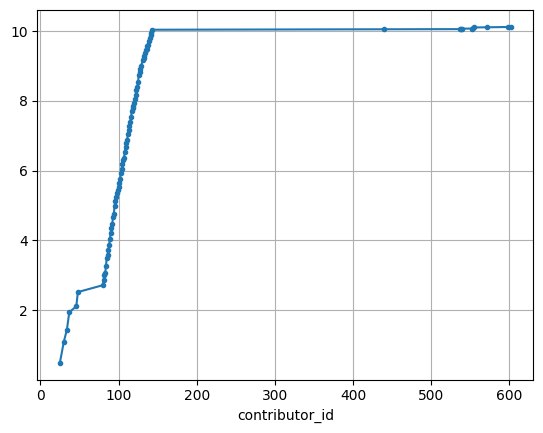

In [29]:
ax = ids.cumsum().plot(kind='line',style='.-',grid=True)

In [9]:
transcription_df.groupby('gender').duration.sum()

gender
Female    4.557222
Male      5.570556
Name: duration, dtype: float64

In [32]:
ads = pd.DataFrame(transcription_df.groupby('contributor_id')).groupby('gender').duration.sum()
ads.cumsum().plot(kind='line',style='.-',grid=True)

KeyError: 'gender'